In [1]:
from nba_api.stats.endpoints import leaguedashplayershotlocations, shotchartdetail
import pandas as pd
from selenium import webdriver


In [2]:
leaguedashplayershotlocations.LeagueDashPlayerShotLocations?

In [5]:
# Download chrome webdriver here: https://chromedriver.storage.googleapis.com/index.html?path=79.0.3945.36/

driver = webdriver.Chrome('/Users/jordanlevy/Downloads/chromedriver') # change to your path for chromedriver
script_dir = '/Users/jordanlevy/Documents/GitHub/group078' # change to your script directory path

In [152]:
total_data = pd.DataFrame()
for yr in range(2000, 2020):
    yr_data = pd.read_csv('data/{}-{}_shot_locations.csv'.format(str(yr), str(yr+1)[-2:]), header=[0,1])
    print(yr_data)
    total_data = total_data.append(yr_data)

    Player_Info                                                          \
      PLAYER_ID         PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   
0           920          A.C. Green  1610612748               MIA  37.0   
1          2062         A.J. Guyton  1610612741               CHI  23.0   
2           243         Aaron McKie  1610612755               PHI  28.0   
3          1425      Aaron Williams  1610612751               NJN  29.0   
4           228          Adam Keefe  1610612744               GSW  31.0   
..          ...                 ...         ...               ...   ...   
436         781         Will Perdue  1610612757               POR  35.0   
437        1895       William Avery  1610612750               MIN  21.0   
438         440           Zan Tabak  1610612754               IND  31.0   
439        1985     Zendon Hamilton  1610612746               LAC  26.0   
440         980  Zydrunas Ilgauskas  1610612739               CLE  26.0   

    Restricted Area     

    Player_Info                                                          \
      PLAYER_ID         PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   
0           920          A.C. Green  1610612748               MIA  37.0   
1          2062         A.J. Guyton  1610612741               CHI  23.0   
2           243         Aaron McKie  1610612755               PHI  28.0   
3          1425      Aaron Williams  1610612751               NJN  29.0   
4           228          Adam Keefe  1610612744               GSW  31.0   
..          ...                 ...         ...               ...   ...   
436         781         Will Perdue  1610612757               POR  35.0   
437        1895       William Avery  1610612750               MIN  21.0   
438         440           Zan Tabak  1610612754               IND  31.0   
439        1985     Zendon Hamilton  1610612746               LAC  26.0   
440         980  Zydrunas Ilgauskas  1610612739               CLE  26.0   

    Restricted Area     

    Player_Info                                                          \
      PLAYER_ID         PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   
0           920          A.C. Green  1610612748               MIA  37.0   
1          2062         A.J. Guyton  1610612741               CHI  23.0   
2           243         Aaron McKie  1610612755               PHI  28.0   
3          1425      Aaron Williams  1610612751               NJN  29.0   
4           228          Adam Keefe  1610612744               GSW  31.0   
..          ...                 ...         ...               ...   ...   
436         781         Will Perdue  1610612757               POR  35.0   
437        1895       William Avery  1610612750               MIN  21.0   
438         440           Zan Tabak  1610612754               IND  31.0   
439        1985     Zendon Hamilton  1610612746               LAC  26.0   
440         980  Zydrunas Ilgauskas  1610612739               CLE  26.0   

    Restricted Area     

    Player_Info                                                          \
      PLAYER_ID         PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   
0           920          A.C. Green  1610612748               MIA  37.0   
1          2062         A.J. Guyton  1610612741               CHI  23.0   
2           243         Aaron McKie  1610612755               PHI  28.0   
3          1425      Aaron Williams  1610612751               NJN  29.0   
4           228          Adam Keefe  1610612744               GSW  31.0   
..          ...                 ...         ...               ...   ...   
436         781         Will Perdue  1610612757               POR  35.0   
437        1895       William Avery  1610612750               MIN  21.0   
438         440           Zan Tabak  1610612754               IND  31.0   
439        1985     Zendon Hamilton  1610612746               LAC  26.0   
440         980  Zydrunas Ilgauskas  1610612739               CLE  26.0   

    Restricted Area     

In [151]:
total_data['Player_Info'].reset_index(drop=True).drop_duplicates(keep='last')

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE
8379,920,A.C. Green,1610612748,MIA,37.0
8380,2062,A.J. Guyton,1610612741,CHI,23.0
8381,243,Aaron McKie,1610612755,PHI,28.0
8382,1425,Aaron Williams,1610612751,NJN,29.0
8383,228,Adam Keefe,1610612744,GSW,31.0
...,...,...,...,...,...
8815,781,Will Perdue,1610612757,POR,35.0
8816,1895,William Avery,1610612750,MIN,21.0
8817,440,Zan Tabak,1610612754,IND,31.0
8818,1985,Zendon Hamilton,1610612746,LAC,26.0


In [48]:
def dates_scraper(st_yr, end_yr):
    season_dict = {}
    total_dates = pd.Series()
    for curr_yr in range(st_yr, end_yr):
        url = 'https://en.wikipedia.org/wiki/{}-{}_NBA_season'.format(str(curr_yr), str(curr_yr+1)[-2:])
        driver.get(url)
        yr_finder = driver.find_element_by_id('mw-content-text').find_element_by_class_name('infobox').find_elements_by_tag_name('tr')[3].find_elements_by_tag_name('td')[0]
        reg_season = yr_finder.text.split('\n')[0]
        range_reg_season = reg_season.split(' – ')
        start_date = range_reg_season[0]
        end_date = range_reg_season[1]
        print(reg_season)
        daterange = pd.Series(pd.date_range(start_date, end_date))
        total_dates = total_dates.append(daterange)
        season_dict['{}-{}'.format(str(curr_yr), str(curr_yr+1)[-2:])] = daterange.tolist()
    return total_dates.reset_index(drop=True), season_dict

In [49]:
%time total_dates, season_dict = dates_scraper(2000, 2019)

/Users/jordanlevy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


October 31, 2000 – April 18, 2001
October 30, 2001 – April 17, 2002
October 29, 2002 – April 16, 2003
October 28, 2003 – April 14, 2004
November 2, 2004 – April 20, 2005
November 1, 2005 – April 19, 2006
October 31, 2006 – April 18, 2007
October 30, 2007 – April 16, 2008
October 28, 2008 – April 16, 2009
October 27, 2009 – April 14, 2010
October 26, 2010 – April 13, 2011
December 25, 2011 – April 26, 2012
October 30, 2012 – April 17, 2013
October 29, 2013 – April 16, 2014
October 28, 2014 – April 15, 2015
October 27, 2015 – April 13, 2016
October 25, 2016 – April 12, 2017
October 17, 2017 – April 11, 2018
October 16, 2018 – April 10, 2019
CPU times: user 179 ms, sys: 19.8 ms, total: 199 ms
Wall time: 10.2 s


In [133]:
all_players = total_data['Player_Info']['PLAYER_ID'].unique()


In [134]:
player_team_ids = total_data['Player_Info'][['PLAYER_ID', 'TEAM_ID']]

In [137]:
player_team_ids['PLAYER_ID']

0       920
1      2062
2       243
3      1425
4       228
       ... 
436     781
437    1895
438     440
439    1985
440     980
Name: PLAYER_ID, Length: 8820, dtype: int64

In [8]:
%time player_shots = shotchartdetail.ShotChartDetail(team_id=1610612748, player_id=920, timeout=200)
shot_cols = player_shots.get_dict()['resultSets'][0]['headers']

CPU times: user 23.2 ms, sys: 2.89 ms, total: 26.1 ms
Wall time: 1.61 s


In [64]:
from tqdm import tnrange, tqdm_notebook
from tqdm import tqdm

In [65]:
tqdm.pandas(desc='doot')

/Users/jordanlevy/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [12]:
shots = []
player_team_ids.drop_duplicates().progress_apply(lambda x:shots.extend(shotchartdetail.ShotChartDetail(team_id=x['TEAM_ID'],\
                                                                                    player_id=x['PLAYER_ID'], timeout=200)\
                                                      .get_dict()['resultSets'][0]['rowSet']), axis=1)

doot: 100%|██████████| 441/441 [10:00<00:00,  1.36s/it]


0      None
1      None
2      None
3      None
4      None
       ... 
436    None
437    None
438    None
439    None
440    None
Length: 441, dtype: object

In [13]:
total_player_shots = pd.DataFrame(data=shots, columns=shot_cols)
total_player_shots.to_csv('total_player_shots.csv', index=False)

In [53]:
total_player_shots = pd.read_csv('total_player_shots.csv')

In [54]:
total_player_shots['GAME_DATE']

0         20001101
1         20001101
2         20001104
3         20001111
4         20001111
            ...   
385751    19990211
385752    19990211
385753    19990211
385754    19990211
385755    19990211
Name: GAME_DATE, Length: 385756, dtype: int64

In [55]:
total_player_shots['GAME_DATE'] = pd.to_datetime(total_player_shots['GAME_DATE'], format='%Y%m%d')

In [60]:
total_player_shots['GAME_DATE'][0]

Timestamp('2000-11-01 00:00:00')

In [62]:
def season_finder(row):
    for key in season_dict:  
        if row in season_dict[key]:
            return key

In [67]:
total_player_shots['Season'] = total_player_shots['GAME_DATE'].progress_apply(season_finder)


doot:  51%|█████▏    | 198256/385756 [00:19<00:17, 10781.78it/s]


doot:  97%|█████████▋| 373513/385756 [00:37<00:01, 7986.97it/s]


doot: 100%|██████████| 385756/385756 [00:39<00:00, 9849.06it/s]


In [80]:
total_player_shots[total_player_shots['Season'].isnull()]['GAME_DATE'].sort_values(ascending=False)

35778    2000-04-19
168323   2000-04-19
48779    2000-04-19
367513   2000-04-19
367512   2000-04-19
            ...    
199870   1996-11-01
306288   1996-11-01
306289   1996-11-01
199871   1996-11-01
33532    1996-11-01
Name: GAME_DATE, Length: 122179, dtype: datetime64[ns]

In [84]:
total_player_shots = total_player_shots.dropna().reset_index(drop=True)

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
filt_shots = total_player_shots[(total_player_shots['LOC_Y'] <= 300) & (total_player_shots['Season'] == '2018-19')]

In [128]:
filt_shots['PLAYER_NAME'].unique()

array(['Dirk Nowitzki'], dtype=object)

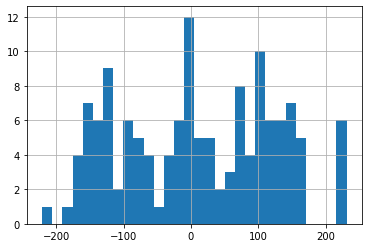

In [118]:
filt_shots['LOC_X'].hist(bins=30)

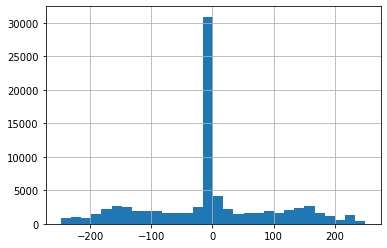

In [109]:
filt_shots['LOC_X'].hist(bins=30)

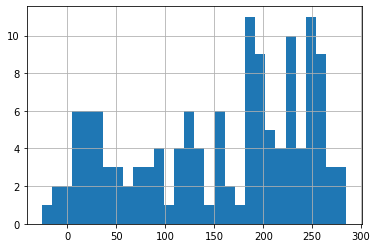

In [119]:
filt_shots['LOC_Y'].hist(bins=30)

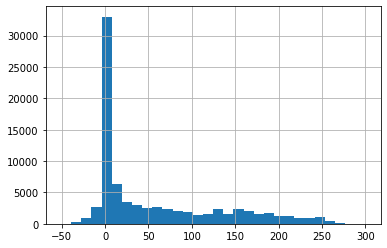

In [110]:
filt_shots['LOC_Y'].hist(bins=30)

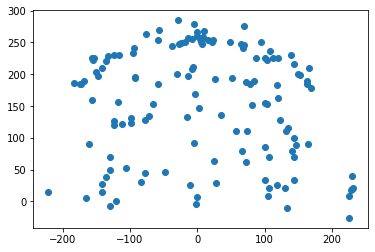

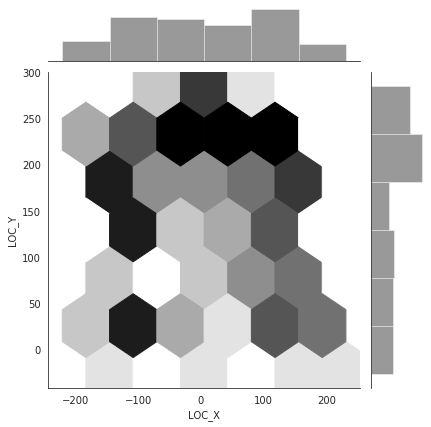

In [122]:
x, y = filt_shots['LOC_X'], filt_shots['LOC_Y']
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex', color='k')

In [34]:
%time player2_shots = shotchartdetail.ShotChartDetail(team_id=1610612741, player_id=2062)

CPU times: user 24.9 ms, sys: 4.51 ms, total: 29.4 ms
Wall time: 11.6 s


CPU times: user 25.1 ms, sys: 3.11 ms, total: 28.2 ms
Wall time: 7.47 s


In [42]:
shots = []
shots.extend(player_shots.get_dict()['resultSets'][0]['rowSet'])
shots.extend(player2_shots.get_dict()['resultSets'][0]['rowSet'])
pd.DataFrame(data=shots, columns=shot_cols)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0020000016,81,920,A.C. Green,1610612748,Miami Heat,1,3,16,...,Center(C),16-24 ft.,21,62,209,1,1,20001101,MIA,ORL
1,Shot Chart Detail,0020000016,221,920,A.C. Green,1610612748,Miami Heat,2,2,0,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20001101,MIA,ORL
2,Shot Chart Detail,0020000035,124,920,A.C. Green,1610612748,Miami Heat,2,8,47,...,Right Side(R),16-24 ft.,18,188,0,1,1,20001104,MIA,PHI
3,Shot Chart Detail,0020000094,141,920,A.C. Green,1610612748,Miami Heat,2,10,4,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20001111,PHX,MIA
4,Shot Chart Detail,0020000094,178,920,A.C. Green,1610612748,Miami Heat,2,6,15,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20001111,PHX,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Shot Chart Detail,0020100828,301,2062,A.J. Guyton,1610612741,Chicago Bulls,3,5,6,...,Left Side Center(LC),24+ ft.,24,-193,148,1,1,20020301,CHI,WAS
305,Shot Chart Detail,0020100904,325,2062,A.J. Guyton,1610612741,Chicago Bulls,3,1,29,...,Right Side Center(RC),24+ ft.,25,142,207,1,1,20020311,CHI,SAC
306,Shot Chart Detail,0020100911,456,2062,A.J. Guyton,1610612741,Chicago Bulls,4,1,36,...,Center(C),Less Than 8 ft.,3,7,34,1,1,20020312,MIL,CHI
307,Shot Chart Detail,0020101010,491,2062,A.J. Guyton,1610612741,Chicago Bulls,4,3,26,...,Left Side Center(LC),24+ ft.,26,-166,205,1,1,20020326,ORL,CHI


In [28]:
(player_info.get_json())

str

In [2]:
import pandas as pd

In [69]:
top_headers

['Restricted Area',
 'In The Paint (Non-RA)',
 'Mid-Range',
 'Left Corner 3',
 'Right Corner 3',
 'Above the Break 3',
 'Backcourt']

In [76]:
sub_headers[5:8]

['FGM', 'FGA', 'FG_PCT']

In [75]:
list(zip(top_headers, sub_headers[5:]))

[('Restricted Area', 'FGM'),
 ('In The Paint (Non-RA)', 'FGA'),
 ('Mid-Range', 'FG_PCT'),
 ('Left Corner 3', 'FGM'),
 ('Right Corner 3', 'FGA'),
 ('Above the Break 3', 'FG_PCT'),
 ('Backcourt', 'FGM')]

In [157]:

def shot_location_scraper(start_yr, end_yr):
    for yr in range(int(start_yr), int(end_yr)+1):
        yr_str = '{}-{}'.format(yr, str(yr+1)[-2:])
        player_info = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(season=yr_str, timeout=100)
        yr_data = player_info.get_dict()['resultSets']
        headers = yr_data['headers']
        data = yr_data['rowSet']
        sub_headers = headers[1]['columnNames']
        top_headers = headers[0]['columnNames']
        top_headers_name = headers[0]['name']
        sub_headers_name = headers[1]['name']
        cur_heads = pd.MultiIndex.from_product([['Player_Info'], sub_headers[:5]])
        final_headers = cur_heads.append(pd.MultiIndex.from_product([top_headers, sub_headers[5:8]], 
                                                  names=[top_headers_name, sub_headers_name]))
        pd.DataFrame(data=data, columns=final_headers).to_csv('data/{}_shot_locations.csv'.format(yr_str), index=False)
        print('{} done'.format(yr_str))

In [ ]:
shot_location_scraper(2000, 2020)

2000-01 done
2001-02 done
2002-03 done
2003-04 done
2004-05 done
2005-06 done
2006-07 done
2007-08 done
2008-09 done
2009-10 done
2010-11 done
2011-12 done
2012-13 done
2013-14 done


In [67]:
sub_headers

['PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'AGE',
 'FGM',
 'FGA',
 'FG_PCT',
 'FGM',
 'FGA',
 'FG_PCT',
 'FGM',
 'FGA',
 'FG_PCT',
 'FGM',
 'FGA',
 'FG_PCT',
 'FGM',
 'FGA',
 'FG_PCT',
 'FGM',
 'FGA',
 'FG_PCT',
 'FGM',
 'FGA',
 'FG_PCT']

In [58]:
header = pd.MultiIndex.from_product([['location1','location2'],
                                     ['S1','S2','S3']],
                                    names=['loc','S'])

MultiIndex([('location1', 'S1'),
            ('location1', 'S2'),
            ('location1', 'S3'),
            ('location2', 'S1'),
            ('location2', 'S2'),
            ('location2', 'S3')],
           names=['loc', 'S'])

In [57]:
pd.DataFrame(data=data, columns=headers)

[[203932,
  'Aaron Gordon',
  1610612753,
  'ORL',
  24.0,
  173,
  258,
  0.671,
  41,
  116,
  0.353,
  32,
  126,
  0.254,
  10,
  27,
  0.37,
  5,
  18,
  0.278,
  53,
  175,
  0.303,
  0,
  6,
  0.0],
 [1628988,
  'Aaron Holiday',
  1610612754,
  'IND',
  23.0,
  68,
  127,
  0.535,
  27,
  83,
  0.325,
  27,
  83,
  0.325,
  5,
  14,
  0.357,
  10,
  19,
  0.526,
  65,
  169,
  0.385,
  0,
  1,
  0.0],
 [1627846,
  'Abdel Nader',
  1610612760,
  'OKC',
  26.0,
  47,
  70,
  0.671,
  10,
  32,
  0.313,
  4,
  13,
  0.308,
  7,
  20,
  0.35,
  7,
  14,
  0.5,
  25,
  71,
  0.352,
  0,
  0,
  0.0],
 [1629690,
  'Adam Mokoka',
  1610612741,
  'CHI',
  21.0,
  6,
  12,
  0.5,
  0,
  0,
  0.0,
  0,
  1,
  0.0,
  1,
  4,
  0.25,
  2,
  4,
  0.5,
  3,
  7,
  0.429,
  0,
  0,
  0.0],
 [1629678,
  'Admiral Schofield',
  1610612764,
  'WAS',
  23.0,
  9,
  17,
  0.529,
  3,
  6,
  0.5,
  4,
  5,
  0.8,
  3,
  6,
  0.5,
  3,
  9,
  0.333,
  8,
  31,
  0.258,
  0,
  1,
  0.0],
 [201143,
  'Al

In [4]:
response =requests.get('https://stats.nba.com/players/shooting/?SeasonType=Regular%20Season&DistanceRange=By%20Zone&Season=2019-20')

In [7]:
response.content

b'<!DOCTYPE html>\n<html xmlns:ng="http://angularjs.org" lang="en" ng-app="stats" ng-strict-di stats-version="4.28.0" stats-build-date="2020-05-21 10:24 AM">\n\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1"><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQECWF5UChAHUlNTBwgBVw==",licenseKey:"09f0cb5c68",applicationID:"76210961"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(21),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrD